In [36]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing, warnings

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
!unzip /content/drive/MyDrive/stage_2_detailed_class_info.csv.zip
!unzip /content/drive/MyDrive/stage_2_train_labels.csv.zip

Archive:  /content/drive/MyDrive/stage_2_detailed_class_info.csv.zip
  inflating: stage_2_detailed_class_info.csv  
Archive:  /content/drive/MyDrive/stage_2_train_labels.csv.zip
  inflating: stage_2_train_labels.csv  


In [41]:
#dfclass_info = pd.read_csv(os.path.join(ROOT_DIR, 'stage_2_detailed_class_info.csv'))
dfclass_info = pd.read_csv('/content/stage_2_detailed_class_info.csv')
dfclass_info.head(6)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [42]:
dftrain_labels = pd.read_csv('/content/stage_2_train_labels.csv')
dftrain_labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [43]:
dfSubmission = pd.read_csv('/content/drive/MyDrive/stage_2_sample_submission.csv')
dfSubmission.head(6)

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100
5,0015597f-2d69-4bc7-b642-5b5e01534676,0.5 0 0 100 100


In [44]:
print(dfclass_info.shape)

(30227, 2)


In [45]:
dfclass_info.dtypes

patientId    object
class        object
dtype: object

In [46]:
print("# of unique patient IDs: ", dfclass_info['patientId'].nunique())

# of unique patient IDs:  26684


In [47]:
dfclass_info['patientId'].value_counts().value_counts()

1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

In [48]:
dftrain_labels.shape


(30227, 6)

In [49]:
dftrain_labels.dtypes

patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

In [50]:
dftrain_labels.isnull().values.any()

True

In [51]:
dftrain_labels = dftrain_labels.fillna(0)
dftrain_labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [52]:
dfclass_info.isnull().values.any()

False

Bar Plot (value_count) for  Target: 


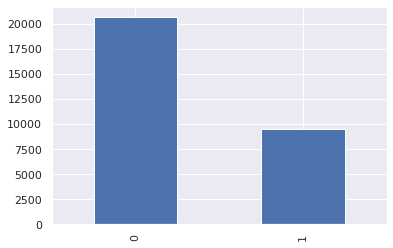

In [53]:
print('Bar Plot (value_count) for  Target: ')

dftrain_labels['Target'].value_counts().plot(kind="bar");

In [10]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 5.4 MB/s 


In [11]:
import pydicom
from zipfile import ZipFile
import os

In [12]:
cd /content/sample_data/Stage2-data

/content/sample_data/Stage2-data


In [13]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/drive/MyDrive/stage_2_train_images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [54]:

patientId = dftrain_labels['patientId'][0]
dicom_file = '/content/sample_data/Stage2-data//%s.dcm' % patientId
dicom_data = pydicom.read_file(dicom_file)

In [55]:
dicom_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [56]:
#/content/stage2-data/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm
def get_info(patientId, root_dir='/content/sample_data/Stage2-data'):
    file_name = os.path.join(root_dir, f'{patientId}.dcm')
    dicom_data = pydicom.read_file(file_name)
    return {'age': dicom_data.PatientAge, 
            'gender': dicom_data.PatientSex,
            'view_position': dicom_data.ViewPosition,
            'id': os.path.basename(file_name).split('.')[0],
            'pixel_spacing': float(dicom_data.PixelSpacing[0]),
            'mean_black_pixels': np.mean(dicom_data.pixel_array == 0)}

patient_ids = list(dftrain_labels.patientId.unique())
with multiprocessing.Pool(4) as pool:
    result = pool.map(get_info, patient_ids)
    
demo = pd.DataFrame(result)
demo['age'] = demo['age'].astype(int)
demo['gender'] = demo['gender'].astype('category')
demo['view_position'] = demo['view_position'].astype('category')

dftrain_labels = (dftrain_labels.merge(demo, left_on='patientId', 
                                                   right_on='id', how='left')
                        .drop(columns='id'))

In [57]:
dftrain_labels[2:5]

,patientId,x,y,width,height,Target,age,gender,view_position,pixel_spacing,mean_black_pixels
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,19,M,AP,0.168,0.000000
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,28,M,PA,0.143,0.011372
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,32,F,AP,0.139,0.002634


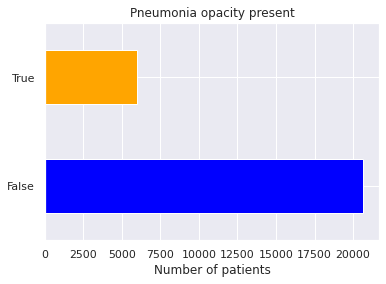

In [58]:
# sns.set_style('darkgrid')
# sns.set_context('notebook', font_scale=1.4)

# plt.rcParams['figure.figsize'] = [12, 3]
# plt.rcParams['lines.linewidth'] = 1

boxes_per_patient = dftrain_labels.groupby('patientId')['Target'].sum()

ax = (boxes_per_patient > 0).value_counts().plot.barh(color=['blue','orange'])
_ = ax.set_title('Pneumonia opacity present')
_ = ax.set_xlabel('Number of patients')
_ = ax.xaxis.set_tick_params(rotation=0)

In [59]:
import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

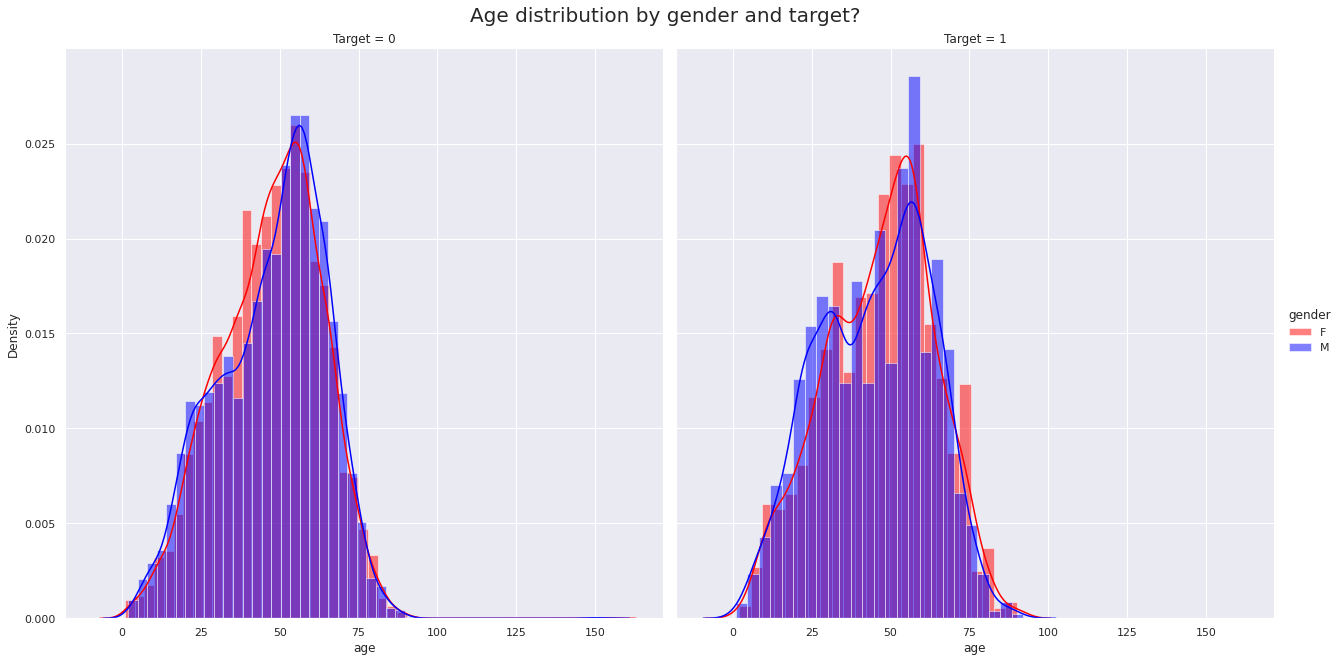

In [60]:
g = sns.FacetGrid(col='Target', hue='gender', 
                  data=dftrain_labels.drop_duplicates(subset=['patientId']), 
                  height=9, palette=dict(F="red", M="blue"))
_ = g.map(sns.distplot, 'age', hist_kws={'alpha': 0.5}).add_legend()
_ = g.fig.suptitle("Age distribution by gender and target?", y=1.02, fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


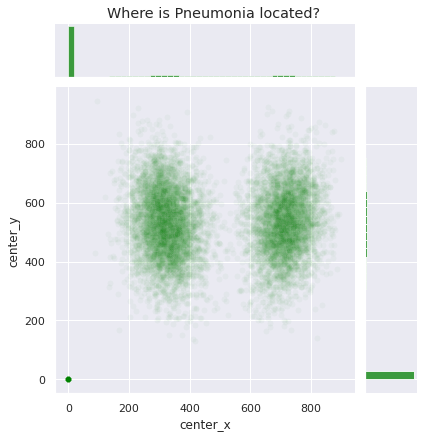

In [61]:
centers = (dftrain_labels.dropna(subset=['x'])
           .assign(center_x=dftrain_labels.x + dftrain_labels.width / 2, 
                   center_y=dftrain_labels.y + dftrain_labels.height / 2))
ax = sns.jointplot("center_x", "center_y", data=centers, height=6, alpha=0.03, color="green")
_ = ax.fig.suptitle("Where is Pneumonia located?", y=1.01)

In [62]:
#Merging both the Dataframe
dftrain_labels = dftrain_labels.merge(dfclass_info, left_on='patientId', right_on='patientId', how='inner')
dftrain_labels[2:5]

,patientId,x,y,width,height,Target,age,gender,view_position,pixel_spacing,mean_black_pixels,class
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,19,M,AP,0.168,0.000000,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,28,M,PA,0.143,0.011372,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,32,F,AP,0.139,0.002634,Lung Opacity


In [63]:
dftrain_labels['aspect_ratio'] = (dftrain_labels['width'] / 
                                        dftrain_labels['height'])
dftrain_labels['area'] = dftrain_labels['width'] * dftrain_labels['height']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


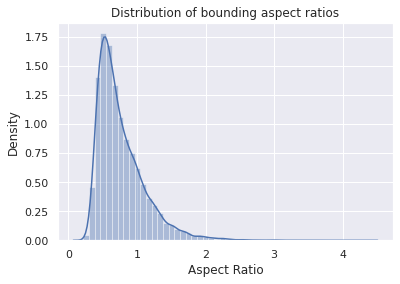

In [64]:
ax = sns.distplot(dftrain_labels['aspect_ratio'].dropna(), norm_hist=True)
_ = ax.set_title("Distribution of bounding aspect ratios")
_ = ax.set_xlabel("Aspect Ratio")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

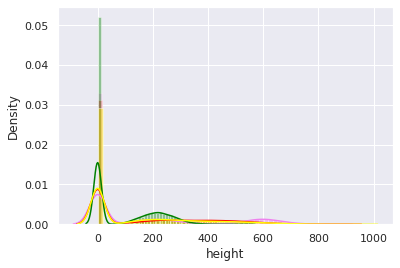

In [65]:
sns.distplot(dftrain_labels['x'],kde=True,bins=50, color="violet")
sns.distplot(dftrain_labels['y'],kde=True,bins=50, color="red")
sns.distplot(dftrain_labels['width'],kde=True,bins=50, color="green")
sns.distplot(dftrain_labels['height'],kde=True,bins=50, color="yellow")


In [66]:
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join("/content/sample_data/Stage2-data/",patientImage)
        data_row_img_data = pydicom.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = pydicom.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

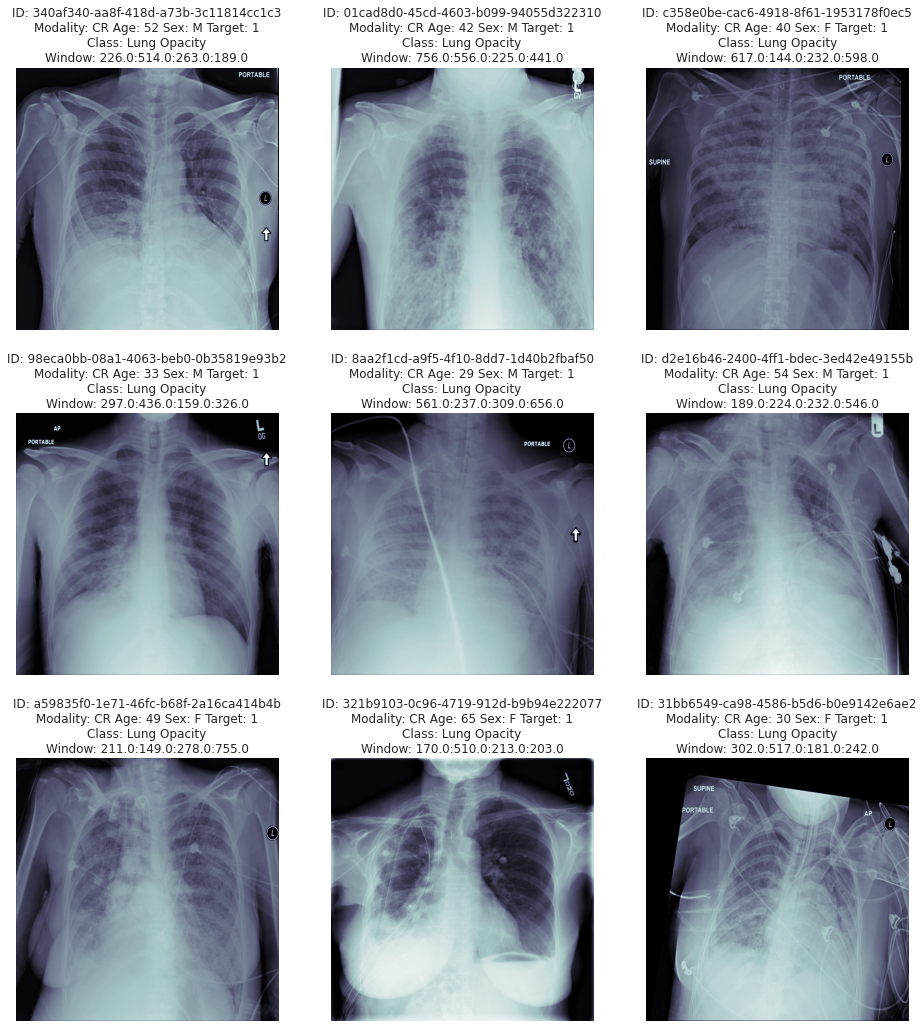

In [67]:
show_dicom_images(dftrain_labels[dftrain_labels['Target']==1].sample(9))

In [68]:
from matplotlib.patches import Rectangle
def show_imageboxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join("","/content/sample_data/Stage2-data/",patientImage)
        data_row_img_data = pydicom.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = pydicom.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = dftrain_labels[dftrain_labels['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="red",alpha = 0.1))   
    plt.show()

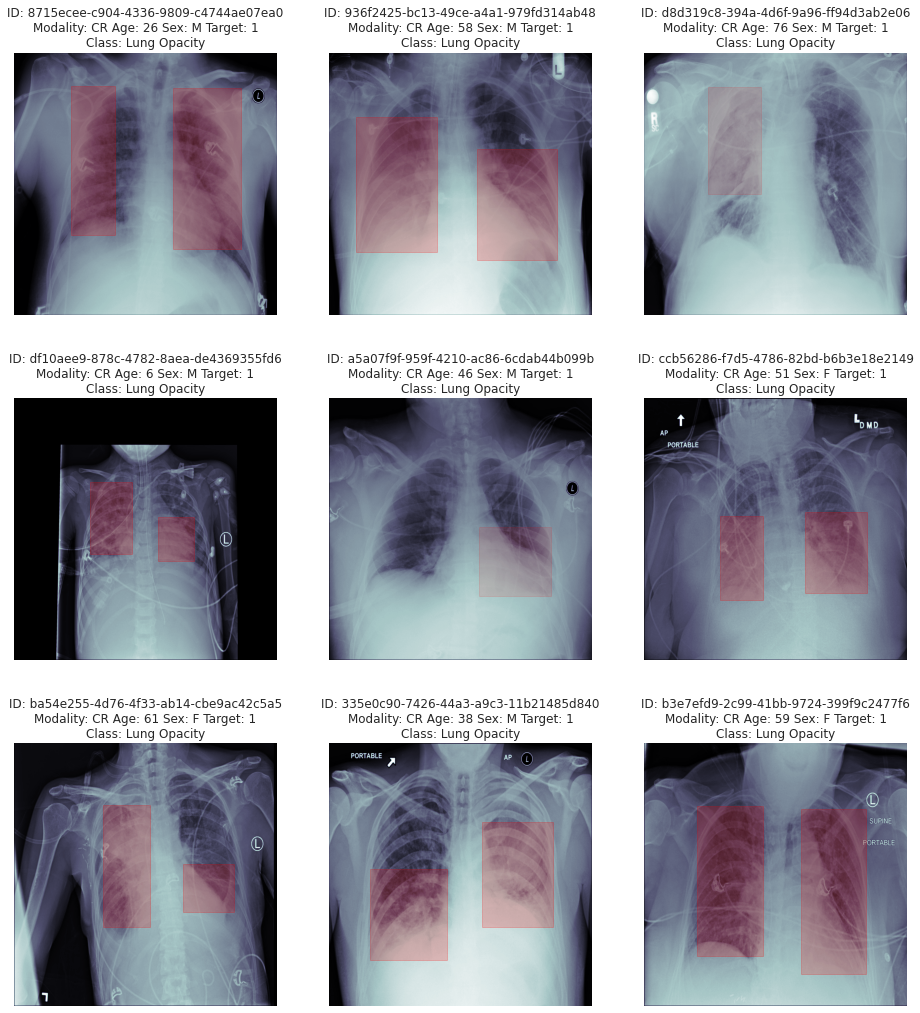

In [69]:
show_imageboxes(dftrain_labels[dftrain_labels['Target']==1].sample(9))

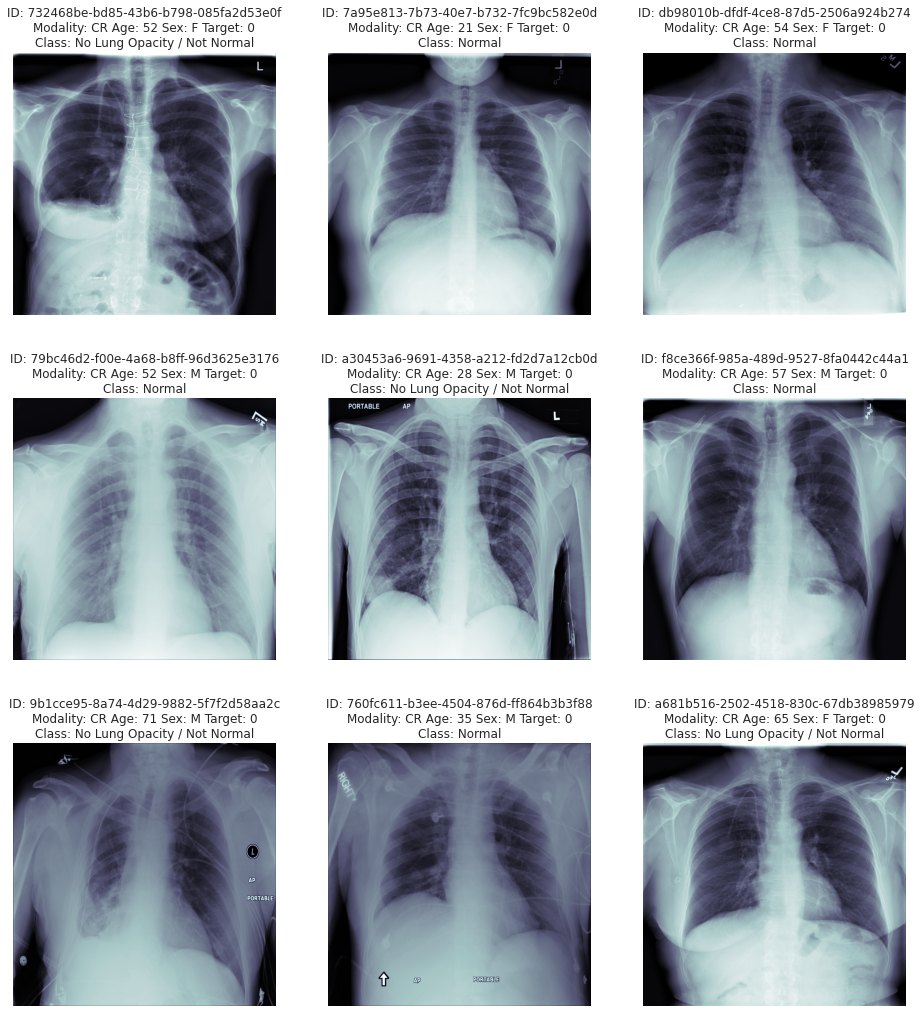

In [35]:
show_imageboxes(dftrain_labels[dftrain_labels['Target']==0].sample(9))